#DATA PREPROCESSING

##Data Pre-processing includes the following main tasks

###1.Import the Libraries.

###2.Reading the dataset.

###3.Analyse the data.

###4.Taking Care of Missing data.

###5.Data Visualization.

###6.Splitting the Dataset into Dependent and Independent variables.

###7.Splitting Data into Train and Test

#####1.Import the Libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
warnings.filterwarnings("ignore")

#####2.Reading the dataset.

In [ ]:
df=pd.read_csv('indian_liver_patient.csv')
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


#####3.Analyse the data.

In [ ]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [ ]:
df.shape

(583, 11)

In [ ]:
# Target feature:
print("Liver Disease Patients      :", df['Dataset'].value_counts()[1])
print("Non Liver Disease Patients  :", df['Dataset'].value_counts()[2])
 #there are two different value sets 1 and 2 count of each class have huge difference one is 416 and other one is 167 it results in imbalancing so we need to do SMOTE

Liver Disease Patients      : 416
Non Liver Disease Patients  : 167


In [ ]:
+df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


#####4.Taking Care of Missing data.

In [ ]:
df.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [ ]:
print(df['Albumin_and_Globulin_Ratio'].median())

0.93


In [ ]:
#Albumin_and_Globulin_Ratio(This column contains missing value we need to replace it)
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median(),inplace=True)

In [ ]:
df.isnull().any() #again checking for missing value after replacing the past values

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio    False
Dataset                       False
dtype: bool

#####5.Data Visualization.

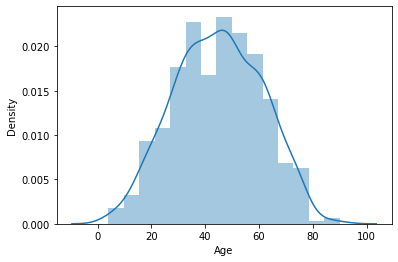

In [ ]:
#Univariate Analysis
sns.distplot(df.Age)

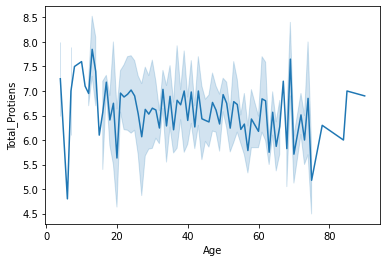

In [ ]:
# Bi- Variate Analysis
sns.lineplot(df.Age,df.Total_Protiens )

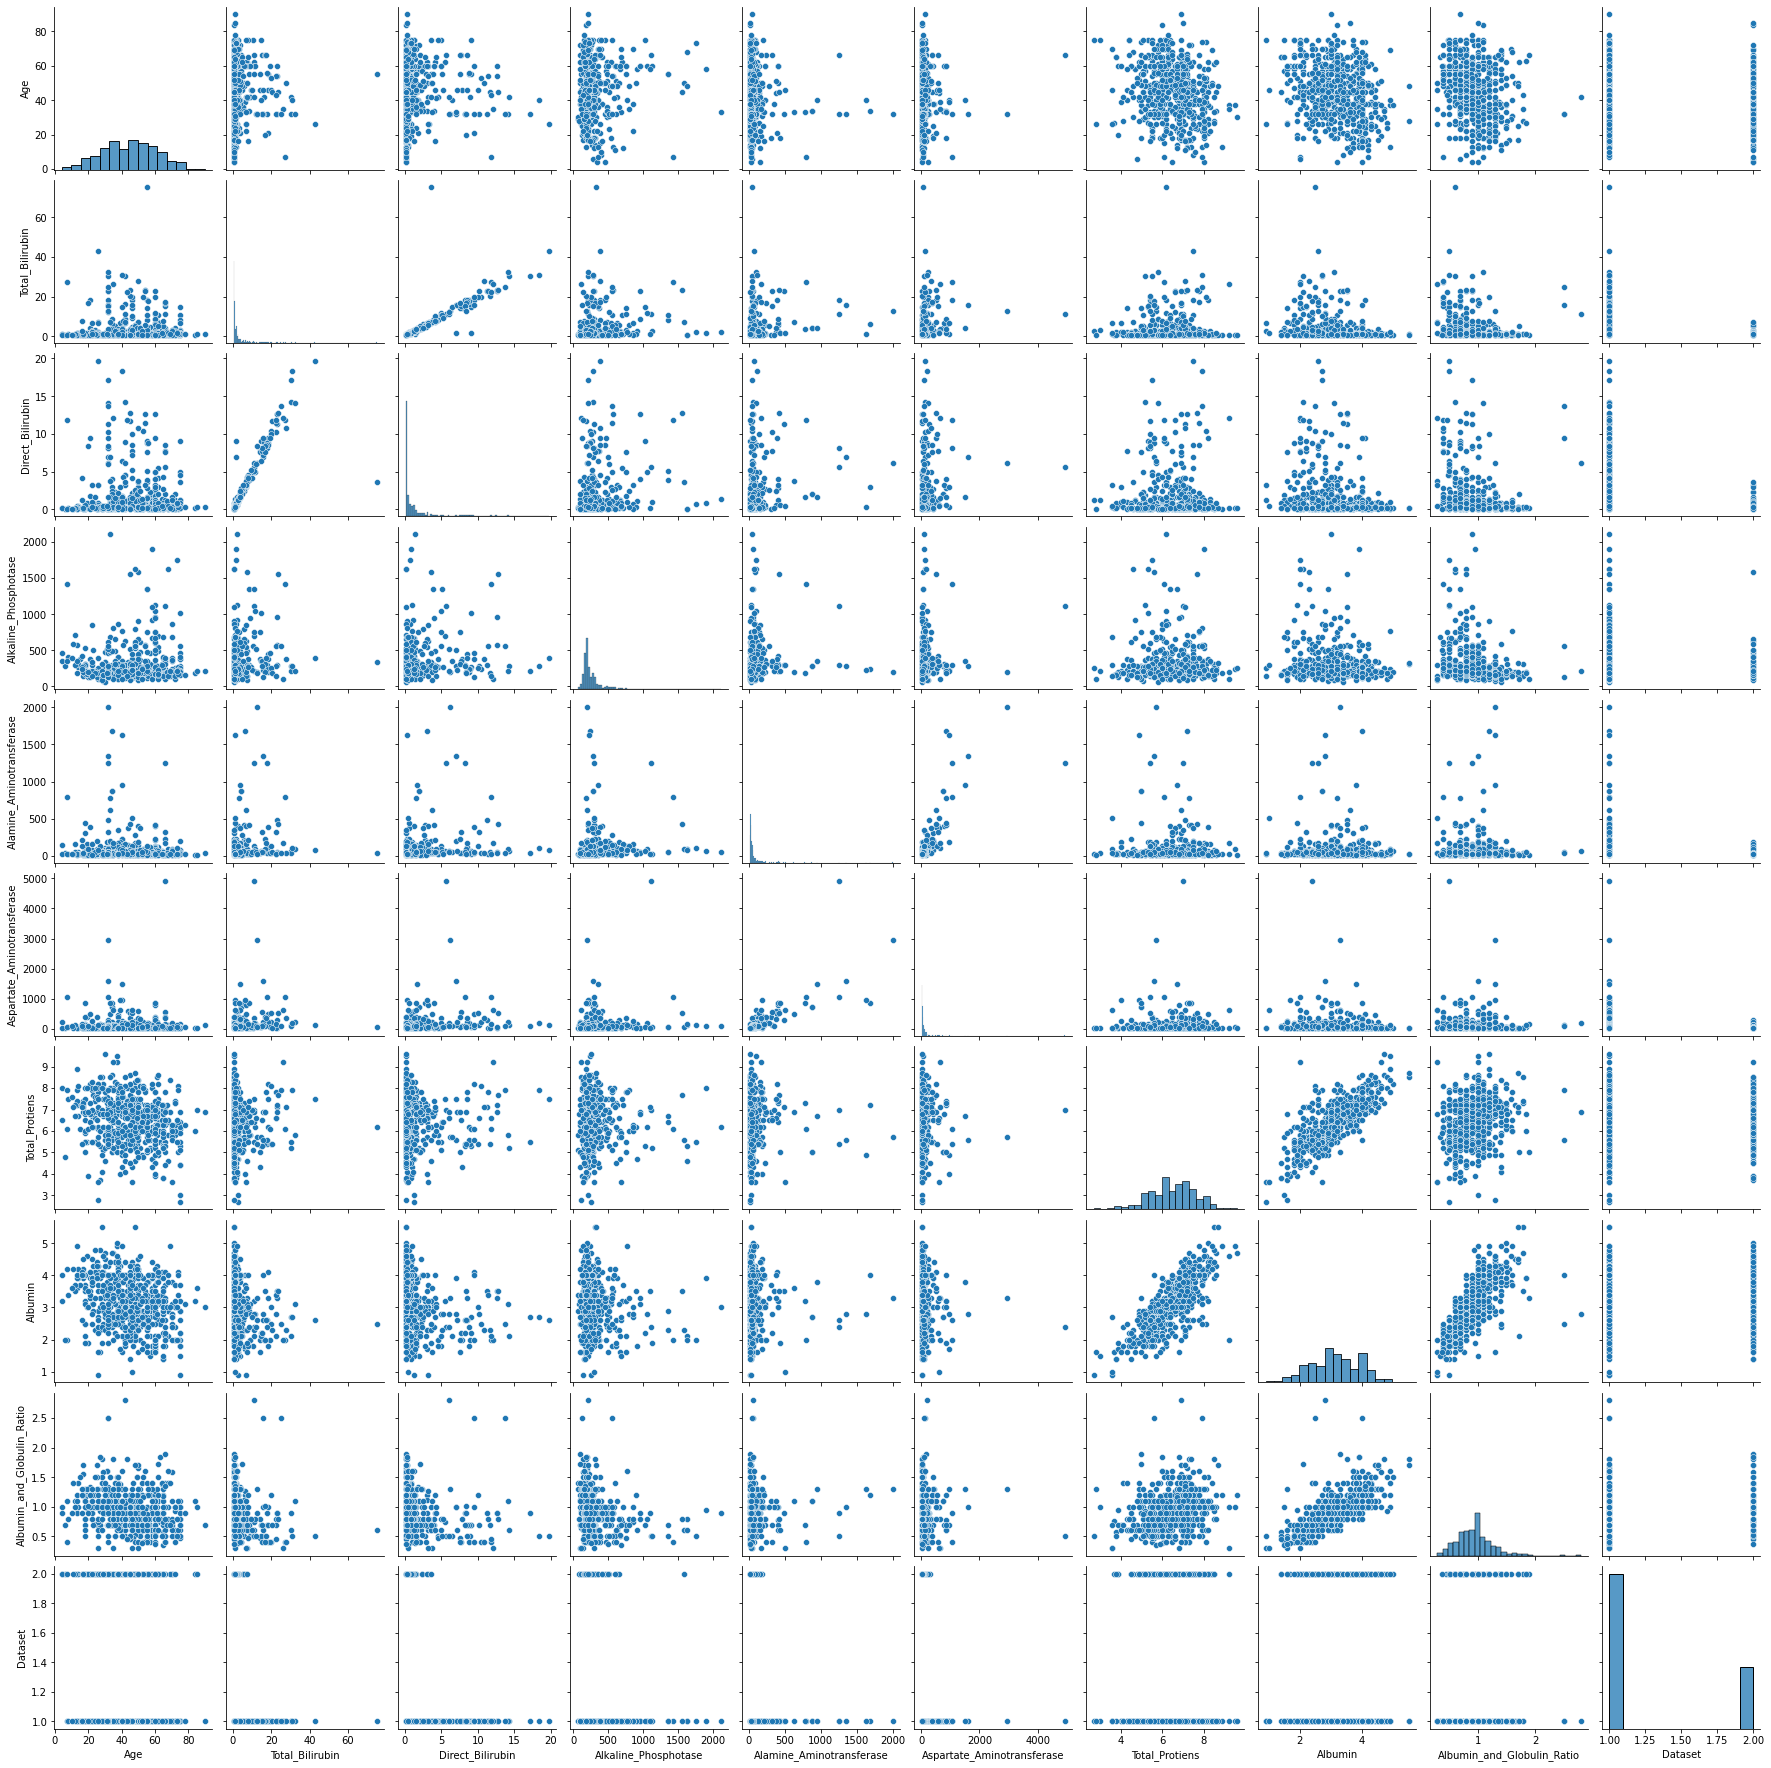

In [ ]:
#Multi-Variate Analysis
sns.pairplot(df)

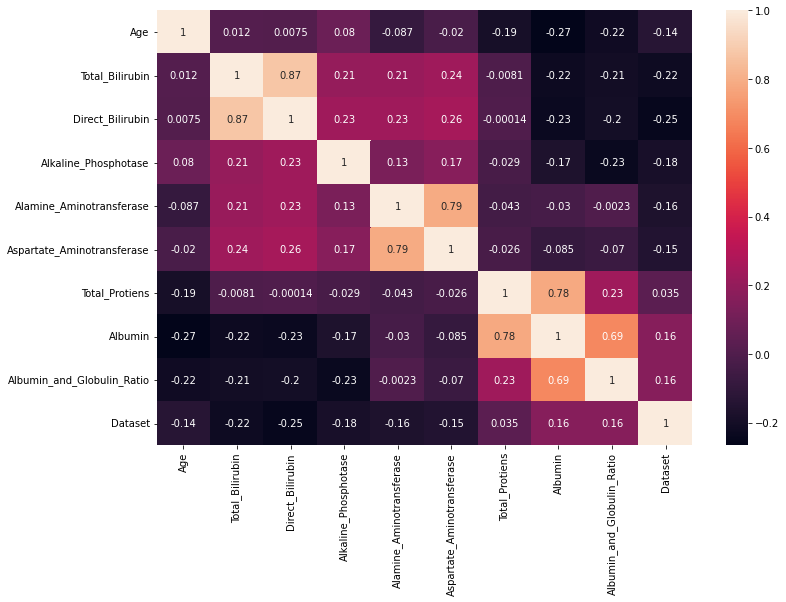

In [ ]:
# Correlation using Heatmap:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
##There is a multicollinearity in our data set

In [ ]:
#Multicollinearity between 'Total_Bilirubin' and 'Direct_Bilirubin' is 87%
#Multicollinearity between 'Alamine_Aminotransferase' and 'Aspartate_Aminotransferase' is 79%
#Multicollinearity between 'Total_Protiens' and 'Albumin' is 78%
#Multicollinearity between 'Albumin' and 'Albumin_and_Globulin_Ratio' is 69%

In [ ]:
#Usually we drop that feature which has above 0.85% multicollinearity between two independent feature. Here we have only 'Total_Bilirubin' and 'Direct_Bilirubin' feature which has 0.87% mutlicollinearity. So we drop one of the feature from them and other independent feature has less multicollinearity, less than 0.80% So we keep that feature.

In [ ]:
# Droping 'Direct_Bilirubin' feature:
df=df.drop('Direct_Bilirubin',axis=1)

In [ ]:
df.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,195,27,59,7.3,2.4,0.40,1


In [ ]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [ ]:
# Calculate the boundaries of Total_Protiens feature which differentiates the outliers:
uppper_boundary=df['Total_Protiens'].mean() + 3* df['Total_Protiens'].std()
lower_boundary=df['Total_Protiens'].mean() - 3* df['Total_Protiens'].std()

print(df['Total_Protiens'].mean())
print(lower_boundary)
print(uppper_boundary)

6.483190394511149
3.2268359424407516
9.739544846581545


In [ ]:
# Calculate the boundaries of Albumin feature which differentiates the outliers:
uppper_boundary=df['Albumin'].mean() + 3* df['Albumin'].std()
lower_boundary=df['Albumin'].mean() - 3* df['Albumin'].std()

print(df['Albumin'].mean())
print(lower_boundary)
print(uppper_boundary)

3.141852487135506
0.7552960692434296
5.528408905027582


In [ ]:
# Lets compute the Interquantile range of Total_Bilirubin feature to calculate the boundaries:
IQR = df.Total_Bilirubin.quantile(0.75)-df.Total_Bilirubin.quantile(0.25)

# Extreme outliers
lower_bridge = df['Total_Bilirubin'].quantile(0.25) - (IQR*3)
upper_bridge = df['Total_Bilirubin'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
df.loc[df['Total_Bilirubin'] >= upper_bridge, 'Total_Bilirubin'] = upper_bridge

-4.6000000000000005
8.0


In [ ]:
# Lets compute the Interquantile range of Alkaline_Phosphotase feature to calculate the boundaries:
IQR = df.Alkaline_Phosphotase.quantile(0.75) - df.Alkaline_Phosphotase.quantile(0.25)

# Extreme outliers
lower_bridge = df['Alkaline_Phosphotase'].quantile(0.25) - (IQR*3)
upper_bridge = df['Alkaline_Phosphotase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
df.loc[df['Alkaline_Phosphotase'] >= upper_bridge, 'Alkaline_Phosphotase'] = upper_bridge

-192.0
665.5


In [ ]:
# Lets compute the Interquantile range of Alamine_Aminotransferase feature to calculate the boundaries:
IQR = df.Alamine_Aminotransferase.quantile(0.75) - df.Alamine_Aminotransferase.quantile(0.25)

# Extreme outliers
lower_bridge = df['Alamine_Aminotransferase'].quantile(0.25) - (IQR*3)
upper_bridge = df['Alamine_Aminotransferase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
df.loc[df['Alamine_Aminotransferase'] >= upper_bridge, 'Alamine_Aminotransferase'] = upper_bridge

-89.5
173.0


In [ ]:
# Lets compute the Interquantile range of Aspartate_Aminotransferase feature to calculate the boundaries:
IQR = df.Aspartate_Aminotransferase.quantile(0.75) - df.Aspartate_Aminotransferase.quantile(0.25)

# Extreme outliers
lower_bridge = df['Aspartate_Aminotransferase'].quantile(0.25) - (IQR*3)
upper_bridge = df['Aspartate_Aminotransferase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
df.loc[df['Aspartate_Aminotransferase'] >= upper_bridge, 'Aspartate_Aminotransferase'] = upper_bridge

-161.0
273.0


In [ ]:
# Lets compute the Interquantile range of Albumin_and_Globulin_Ratio feature to calculate the boundaries
IQR = df.Albumin_and_Globulin_Ratio.quantile(0.75) - df.Albumin_and_Globulin_Ratio.quantile(0.25)

# Extreme outliers
lower_bridge = df['Albumin_and_Globulin_Ratio'].quantile(0.25) - (IQR*3)
upper_bridge = df['Albumin_and_Globulin_Ratio'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
df.loc[df['Albumin_and_Globulin_Ratio'] >= upper_bridge, 'Albumin_and_Globulin_Ratio'] = upper_bridge

-0.5000000000000004
2.3000000000000007


In [ ]:
df.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,187.0,16,18,6.8,3.3,0.90,1
1,62,Male,8.0,665.5,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,490.0,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,182.0,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,195.0,27,59,7.3,2.4,0.40,1


In [ ]:
# outlier detection 
#sns.boxplot(df.Age)
#sns.boxplot(df.Total_Bilirubin)
#sns.boxplot(df.Direct_Bilirubin)
#sns.boxplot(df.Alkaline_Phosphotase)
#sns.boxplot(df.Alamine_Aminotransferase)
#sns.boxplot(df.Aspartate_Aminotransferase)
#sns.boxplot(df.Total_Protiens)
#sns.boxplot(df.Albumin)
#sns.boxplot(df.Albumin_and_Globulin_Ratio)
#sns.boxplot(df.Dataset)

In [ ]:
#In our dataset Gender column is categorical data so we need to encode

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df.Gender = le.fit_transform(df.Gender)
df.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,187.0,16,18,6.8,3.3,0.90,1
1,62,1,8.0,665.5,64,100,7.5,3.2,0.74,1
2,62,1,7.3,490.0,60,68,7.0,3.3,0.89,1
3,58,1,1.0,182.0,14,20,6.8,3.4,1.00,1
4,72,1,3.9,195.0,27,59,7.3,2.4,0.40,1


#####6.Splitting the Dataset into Dependent and Independent variables.

In [ ]:
## independent varibles-X
X=df.iloc[:,:-1]
X.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,187.0,16,18,6.8,3.3,0.90
1,62,1,8.0,665.5,64,100,7.5,3.2,0.74
2,62,1,7.3,490.0,60,68,7.0,3.3,0.89
3,58,1,1.0,182.0,14,20,6.8,3.4,1.00
4,72,1,3.9,195.0,27,59,7.3,2.4,0.40


In [ ]:
# y target-dependent variable
y=df.Dataset
y

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 583, dtype: int64

In [ ]:
y.value_counts() #in the target column there are 2 classess 1,2 there is huge difference in the counts so imbalance in the dataset
#we need to balance it

1    416
2    167
Name: Dataset, dtype: int64

In [ ]:
# SMOTE Technique:
from imblearn.combine import SMOTETomek
smote = SMOTETomek()
X_smote, y_smote = smote.fit_resample(X,y)
# Counting before and after SMOTE:
from collections import Counter
print('Before SMOTE : ', Counter(y))
print('After SMOTE  : ', Counter(y_smote))

Before SMOTE :  Counter({1: 416, 2: 167})
After SMOTE  :  Counter({1: 391, 2: 391})


In [ ]:
#scaling
#from sklearn.preprocessing import scale
#X_scaled=pd.DataFrame(scale(X),columns=X.columns)
#X_scaled.head()

#####7.Splitting Data into Train and Test

In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X_smote,y_smote, test_size=0.3,random_state=33)

In [ ]:
X_train

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
422,28,1,0.600000,159.000000,15,16,7.000000,3.500000,1.000000
618,38,0,0.881111,110.805535,25,108,6.235278,2.951389,0.889167
704,8,1,0.753553,334.331658,29,44,7.609476,3.804738,1.000000
647,41,0,0.740851,155.042559,36,40,5.112768,2.200000,0.736595
648,35,0,0.778474,202.632173,31,36,8.834063,4.384743,0.982779
...,...,...,...,...,...,...,...,...,...
658,52,1,1.586685,178.066575,44,58,6.521637,3.906658,1.495007
578,64,1,1.001964,283.489357,54,48,7.000000,3.654910,1.052946
728,74,0,0.891060,204.187110,17,18,6.128482,3.218711,1.054470
391,41,1,1.200000,246.000000,34,42,6.900000,3.400000,0.970000


In [ ]:
X_train.shape 

(547, 9)

In [ ]:
y_train.shape

(547,)

In [ ]:
X_test

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
489,53,0,0.900000,210.000000,35,32,8.000000,3.900000,0.900000
233,55,1,0.900000,190.000000,25,28,5.900000,2.700000,0.800000
225,40,1,0.900000,196.000000,69,48,6.800000,3.100000,0.800000
731,25,0,1.428140,183.145732,17,15,7.138316,3.392210,0.885967
400,47,0,0.800000,236.000000,10,13,6.700000,2.900000,0.760000
...,...,...,...,...,...,...,...,...,...
414,17,1,0.900000,279.000000,40,46,7.300000,4.000000,1.200000
716,41,0,0.898765,200.888887,30,23,7.580247,3.788889,0.998765
442,35,1,2.000000,226.000000,33,135,6.000000,2.700000,0.800000
516,46,1,8.000000,232.000000,58,140,7.000000,2.700000,0.600000


In [ ]:
X_test.shape

(235, 9)

#MODEL BUILDING

##Train And Test The Model Using Classification Algorithms

##### model building-1(SUPPORT VECTOR MACHINE)

In [ ]:
# model building(SUPPORT VECTOR MACHINE)

from sklearn.svm import SVC
modelb = SVC()

In [ ]:
modelb.fit(X_train,y_train)

SVC()

In [ ]:
y_pred_test= modelb.predict(X_test)

In [ ]:
y_pred_train= modelb.predict(X_train)

#####Model Evaluation(SVC)

In [ ]:

#EVALUATION METRICES
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
accuracy_score(y_test,y_pred_test)

0.7063829787234043

In [ ]:
accuracy_score(y_train,y_pred_train) #accuracy score not decides my model is good or bad 
#we sholud not check only accuracy score
#overfitting or not for that purpose accuracy score checked
#identify how many classess correctly classified since it is classification algorithm it is necessary to check whether it is correctly classified

0.6837294332723949

In [ ]:
pd.crosstab(y_test,y_pred_test)


col_0,1,2
Dataset,,
1,60,48
2,21,106


In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           1       0.74      0.56      0.63       108
           2       0.69      0.83      0.75       127

    accuracy                           0.71       235
   macro avg       0.71      0.70      0.69       235
weighted avg       0.71      0.71      0.70       235



In [ ]:
#Hyper Parameter Tuning-SVC
#Gridsearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = { 'kernel':['linear','rbf'],
             'C':[0.5,1.0],
             'gamma':['scale','auto']}

In [ ]:
clf  = GridSearchCV(SVC(),param_grid=parameters,verbose =2)

In [ ]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..................C=0.5, gamma=scale, kernel=linear; total time=   1.1s
[CV] END ..................C=0.5, gamma=scale, kernel=linear; total time=   2.7s
[CV] END ..................C=0.5, gamma=scale, kernel=linear; total time=   1.1s
[CV] END ..................C=0.5, gamma=scale, kernel=linear; total time=   0.9s
[CV] END ..................C=0.5, gamma=scale, kernel=linear; total time=   1.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.5, gamma=auto, kernel=linear; total time=   1.1s
[CV] END ...................C=0.5, gamma=auto, ke

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.5, 1.0], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [ ]:
clf.best_score_

0.7075896580483738

In [ ]:
clf.best_params_

{'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
model1= SVC(C=1.0,gamma='scale',kernel = 'linear')

In [ ]:
model1.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
pred_test1 = model1.predict(X_test)

In [ ]:
pred_train1= model1.predict(X_train)

In [ ]:
accuracy_score(y_train,pred_train1)

0.7257769652650823

In [ ]:
accuracy_score(y_test,pred_test1)

0.7787234042553192

In [ ]:
pd.crosstab(y_test,pred_test1)

col_0,1,2
Dataset,,
1,67,41
2,11,116


In [ ]:
print(classification_report(y_test,pred_test1))

              precision    recall  f1-score   support

           1       0.86      0.62      0.72       108
           2       0.74      0.91      0.82       127

    accuracy                           0.78       235
   macro avg       0.80      0.77      0.77       235
weighted avg       0.79      0.78      0.77       235



In [ ]:
from sklearn.model_selection import cross_val_score
scoressvc = cross_val_score(model1, X, y, cv =5)
print('Model accuracy: ',np.mean(scoressvc))

In [ ]:
#SAVING MODEL(SVC)

In [ ]:
import joblib #saving model
joblib.dump(model1,'liverdiseaseSVC.pkl')

['liverdiseaseSVC.pkl']

##### model building-2(KNN Classification)

In [ ]:
# model building(KNN Classification)
from sklearn.neighbors import KNeighborsClassifier
modelb1 =KNeighborsClassifier()

In [ ]:
from sklearn import metrics

In [ ]:
modelb1.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
pred= modelb1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_test,pred)

0.7276595744680852

In [ ]:
pd.crosstab(y_test,pred)

col_0,1,2
Dataset,,
1,65,43
2,21,106


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.76      0.60      0.67       108
           2       0.71      0.83      0.77       127

    accuracy                           0.73       235
   macro avg       0.73      0.72      0.72       235
weighted avg       0.73      0.73      0.72       235



In [ ]:
#Hyper Parameter Tuning-KNN

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
model2 = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
# fit the model on our train set
model2.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
# find the best score
model2.best_score_

0.7697311795672451

In [ ]:
# get the hyperparameters with the best score
model2.best_params_

{'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'distance'}

In [ ]:
# get a prediction
y_train_predict = model2.predict(X_train)
y_test_predict = model2.predict(X_test)

In [ ]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_train_predict))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_test_predict))

Training set accuracy:  1.0
Test set accuracy:  0.7702127659574468


In [ ]:

pd.crosstab(y_test, y_test_predict)

col_0,1,2
Dataset,,
1,63,45
2,9,118


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           1       0.88      0.58      0.70       108
           2       0.72      0.93      0.81       127

    accuracy                           0.77       235
   macro avg       0.80      0.76      0.76       235
weighted avg       0.79      0.77      0.76       235



In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model2, X, y, cv =5)
print('Model accuracy: ',np.mean(scores))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Model accuracy:  0.6911877394636015


In [ ]:
#As we see, we have obtained a very high model accuracy of 0.69. It is possible that the accuracy may be increased further by using more hyperparameters or with a different model.

In [ ]:
#SAVING MODEL(KNN)

In [ ]:
import joblib #saving model
joblib.dump(model2,'liverdiseaseKNN.pkl')

['liverdiseaseKNN.pkl']

#####model building-3(RANDOM FOREST)

In [ ]:
#model building(RANDOM FOREST)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelb2 =RandomForestClassifier(n_estimators=15,max_depth=3)

In [ ]:
modelb2.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=15)

In [ ]:
test_pred = modelb2.predict(X_test)

In [ ]:
train_pred = modelb2.predict(X_train)

In [ ]:
# evaluating the model+

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
print('Testing accuracy: ' , accuracy_score(y_test,test_pred))
print('Training accuracy: ',accuracy_score(y_train,train_pred))

Testing accuracy:  0.7446808510638298
Training accuracy:  0.7568555758683729


In [ ]:
pd.crosstab(y_test,test_pred)

col_0,1,2
Dataset,,
1,72,36
2,24,103


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           1       0.75      0.67      0.71       108
           2       0.74      0.81      0.77       127

    accuracy                           0.74       235
   macro avg       0.75      0.74      0.74       235
weighted avg       0.75      0.74      0.74       235



In [ ]:
#hyperparameter tuning by GridSearchCV

from sklearn.model_selection import GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5,6],
    'min_samples_split': [3,4,5,6],
    'n_estimators': [1150, 1200, 1250, 1300,1350]
}


In [ ]:
# Create a based model
rf = RandomForestClassifier()


In [ ]:
# Instantiate the grid search model
model3 = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)



In [ ]:
# Fit the grid search to the data
model3.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 15],
                         'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [1150, 1200, 1250, 1300, 1350]},
             verbose=2)

In [ ]:
# find the best score
model3.best_score_

0.7678796613222842

In [ ]:
# get the hyperparameters with the best score
model3.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 1150}

In [ ]:
# get a prediction
yrf_train_predict = model3.predict(X_train)
yrf_test_predict = model3.predict(X_test)

In [ ]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, yrf_train_predict))
print('Test set accuracy: ',metrics.accuracy_score(y_test, yrf_test_predict))

Training set accuracy:  0.9853747714808044
Test set accuracy:  0.8170212765957446


In [ ]:
pd.crosstab(y_test, yrf_test_predict)

col_0,1,2
Dataset,,
1,82,26
2,17,110


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yrf_test_predict))

              precision    recall  f1-score   support

           1       0.83      0.76      0.79       108
           2       0.81      0.87      0.84       127

    accuracy                           0.82       235
   macro avg       0.82      0.81      0.81       235
weighted avg       0.82      0.82      0.82       235



In [ ]:
#SAVING MODEL(RANDOM FOREST)

In [ ]:
import joblib #saving model
joblib.dump(model3,'liverdiseaseRF.pkl')

['liverdiseaseRF.pkl']